In [6]:
# Set up
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import reuters
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# Load the Reuters dataset
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# Decoding the newswires back to text
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])

# Encode the input data
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i , sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# Encode the labels
def to_hot_one(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

y_train = to_hot_one(train_labels)
y_test = to_hot_one(test_labels)

In [3]:
# Design the model
model = Sequential([
    Dense(64, activation="relu"),
    Dense(64, activation="relu"),
    Dense(46, activation="softmax")
])

# Compile the model
model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [4]:
# Set aside a validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [5]:
# Train the model
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.3516 - loss: 3.3363 - val_accuracy: 0.6340 - val_loss: 2.0037
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6687 - loss: 1.7364 - val_accuracy: 0.6790 - val_loss: 1.4341
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7184 - loss: 1.2937 - val_accuracy: 0.7240 - val_loss: 1.2328
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7775 - loss: 1.0214 - val_accuracy: 0.7530 - val_loss: 1.1089
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8191 - loss: 0.8357 - val_accuracy: 0.7840 - val_loss: 1.0390
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8479 - loss: 0.7182 - val_accuracy: 0.7950 - val_loss: 0.9809
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8787 - loss: 0.5899 - val_accuracy: 0.8050 - val_loss: 0.9372
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8983 - loss: 0.5112 - val_accuracy: 0.8110 - val_loss

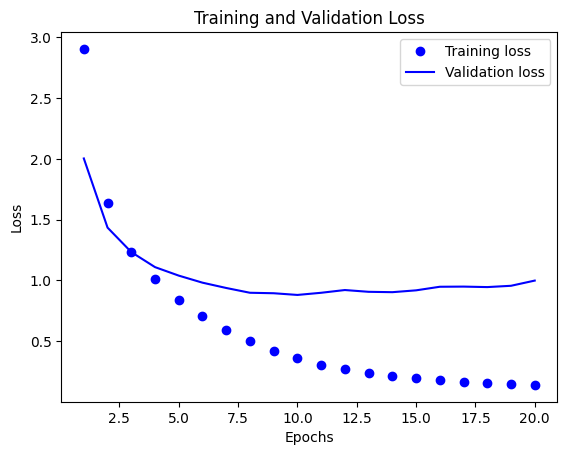

In [9]:
# Plot the training and validation losses
history_dict = history.history
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "-b", label="Validation loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

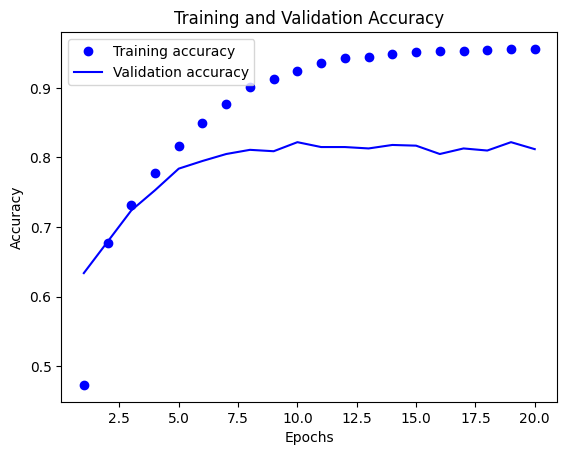

In [10]:
# Plot the training and validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "-b", label="Validation accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [11]:
# Recreate the model
model = Sequential([
    Dense(64, activation="relu"),
    Dense(64, activation="relu"),
    Dense(46, activation="softmax")
])

# Compile the model
model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Train the model
model.fit(
    partial_x_train,
    partial_y_train,
    epochs=10,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.3387 - loss: 3.1547 - val_accuracy: 0.6320 - val_loss: 1.7658
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6737 - loss: 1.5981 - val_accuracy: 0.7040 - val_loss: 1.3328
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7478 - loss: 1.1718 - val_accuracy: 0.7430 - val_loss: 1.1816
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7906 - loss: 0.9651 - val_accuracy: 0.7640 - val_loss: 1.0630
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8331 - loss: 0.7839 - val_accuracy: 0.7900 - val_loss: 0.9941
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8578 - loss: 0.6550 - val_accuracy: 0.7920 - val_loss: 0.9459
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8765 - loss: 0.5582 - val_accuracy: 0.8090 - val_loss: 0.9132
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9006 - loss: 0.4740 - val_accuracy: 0.8010 - val_loss

In [12]:
# Evaluate the model
results = model.evaluate(x_test, y_test)
print(f"Test loss: {results[0]}")
print(f"Test accuracy: {results[1]}")

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - accuracy: 0.7885 - loss: 0.9178
Test loss: 0.9661946892738342
Test accuracy: 0.7787176966667175
